# Ensembles Methods

The three most popular methods for combining the predictions from different models are:

* Bagging: Building multiple models (typically of the same type) from different subsamples of the training dataset.
* Boosting: Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the sequence of models.
* Voting: Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.

## 1. Bagging Algorithms - Ensemble meta Algorithm for Reducing variance

Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset (with replacement) and training a model for each sample. The final output prediction is averaged
across the predictions of all of the sub-models. The main three bagging models covered in this section are:
* Bagged Decision Trees.
* Random Forest.
* Extra Trees.

### 1.1 Bagged Decision Trees

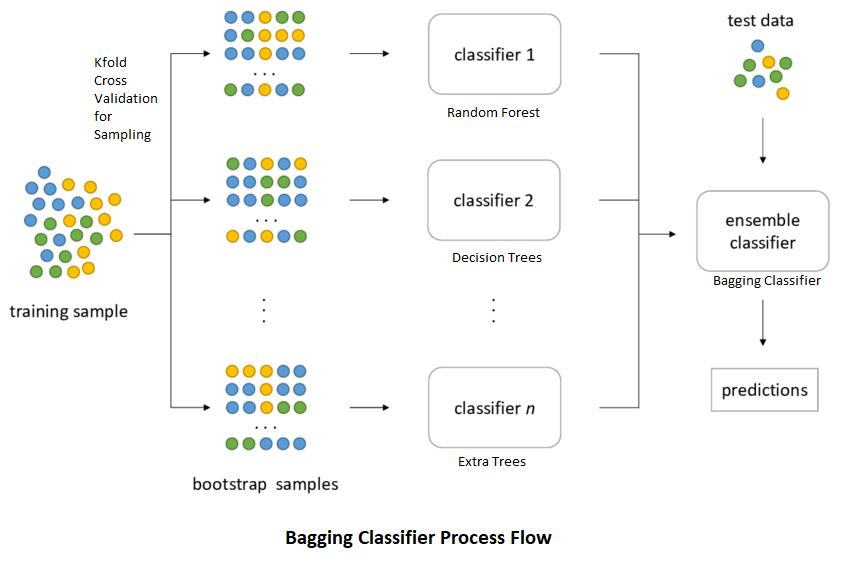


* Bagging performs best with algorithms that have high variance. 
* A popular example are decision trees, often constructed without pruning. 

In the example below is an example of using the BaggingClassifier with the Classification and Regression Trees algorithm (DecisionTreeClassifier). A total of 100 trees are created.

In [1]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
filename = 'data/diabetes.csv'
col = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataset = read_csv(filename,names=col)

In [3]:
dataset.head(5)

preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

In [4]:
array = dataset.values
print(array)
print(type(array))

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
<class 'numpy.ndarray'>


In [5]:
X = array[:,:8]
Y = array[:,-1]

In [6]:
seed = 100
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

In [7]:
results = cross_val_score(model, X, Y, cv=kfold)
for i in range(len(results)):
    print("Model: "+str(i)+" Accuracy is: "+ str(results[i]))

Model: 0 Accuracy is: 0.7402597402597403
Model: 1 Accuracy is: 0.7142857142857143
Model: 2 Accuracy is: 0.7792207792207793
Model: 3 Accuracy is: 0.7532467532467533
Model: 4 Accuracy is: 0.7012987012987013
Model: 5 Accuracy is: 0.7792207792207793
Model: 6 Accuracy is: 0.7922077922077922
Model: 7 Accuracy is: 0.8181818181818182
Model: 8 Accuracy is: 0.7105263157894737
Model: 9 Accuracy is: 0.8289473684210527


In [8]:
# Output of Bagged Decision Trees Ensemble Algorithm.
print("Mean Accuracy is: "+str(results.mean()))

Mean Accuracy is: 0.7617395762132604


### 1.2 Random Forest

Random Forests is an extension of bagged decision trees. Samples of the training dataset are taken with replacement, but the trees are constructed in a way that reduces the correlation between individual classifiers. Specifically, rather than greedily choosing the best split point in the construction of each tree, only a random subset of features are considered for each split. You can construct a Random Forest model for classification using the RandomForestClassifier class. The example below demonstrates using Random Forest for classification with 100 trees
and split points chosen from a random selection of 3 features.

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
for i in range(len(results)):
    print("Model: "+str(i)+" Accuracy is: "+ str(results[i]))

print("Mean Accuracy is: "+str(results.mean()))

Model: 0 Accuracy is: 0.7792207792207793
Model: 1 Accuracy is: 0.7272727272727273
Model: 2 Accuracy is: 0.7922077922077922
Model: 3 Accuracy is: 0.7662337662337663
Model: 4 Accuracy is: 0.7402597402597403
Model: 5 Accuracy is: 0.7662337662337663
Model: 6 Accuracy is: 0.8181818181818182
Model: 7 Accuracy is: 0.8311688311688312
Model: 8 Accuracy is: 0.6710526315789473
Model: 9 Accuracy is: 0.8026315789473685
Mean Accuracy is: 0.7694463431305536


### 1.3 Extra Trees

Extra Trees are another modification of bagging where random trees are constructed from samples of the training dataset. You can construct an Extra Trees model for classification using the ExtraTreesClassifier

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

In [12]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
for i in range(len(results)):
    print("Model: "+str(i)+" Accuracy is: "+ str(results[i]))
print("Mean Accuracy is: "+str(results.mean()))

Model: 0 Accuracy is: 0.7662337662337663
Model: 1 Accuracy is: 0.7792207792207793
Model: 2 Accuracy is: 0.6883116883116883
Model: 3 Accuracy is: 0.7922077922077922
Model: 4 Accuracy is: 0.7662337662337663
Model: 5 Accuracy is: 0.7792207792207793
Model: 6 Accuracy is: 0.6493506493506493
Model: 7 Accuracy is: 0.8051948051948052
Model: 8 Accuracy is: 0.7894736842105263
Model: 9 Accuracy is: 0.75
Mean Accuracy is: 0.7565447710184553


## 2. Boosting Algorithm - Ensemble meta Algorithm for Reducing bias

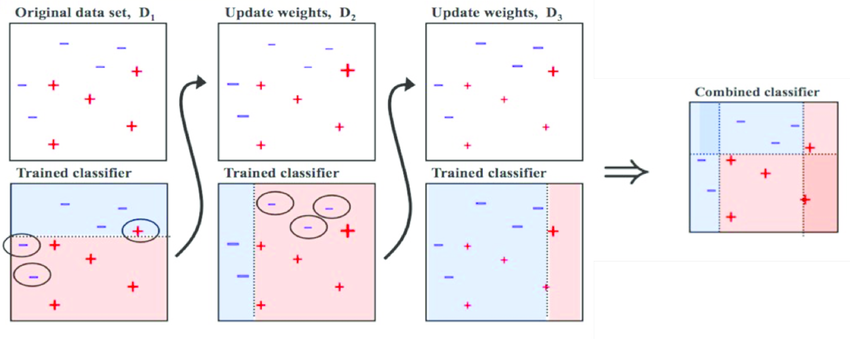



Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence. Once created, the models make predictions which
may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction. 

The two most common boosting ensemble machine learning algorithms are:
    
* AdaBoost.
* Stochastic Gradient Boosting.

### 2.1 AdaBoost Classifier

In [13]:
from sklearn.ensemble import AdaBoostClassifier

In [14]:
num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
for i in range(len(results)):
    print("Model: "+str(i)+" Accuracy is: "+ str(results[i]))
print("Mean Accuracy is: "+str(results.mean()))

Model: 0 Accuracy is: 0.7662337662337663
Model: 1 Accuracy is: 0.7142857142857143
Model: 2 Accuracy is: 0.7142857142857143
Model: 3 Accuracy is: 0.7922077922077922
Model: 4 Accuracy is: 0.7922077922077922
Model: 5 Accuracy is: 0.7402597402597403
Model: 6 Accuracy is: 0.6883116883116883
Model: 7 Accuracy is: 0.7792207792207793
Model: 8 Accuracy is: 0.8026315789473685
Model: 9 Accuracy is: 0.7631578947368421
Mean Accuracy is: 0.7552802460697198


### 2.2 Stochastic Gradient Boosting

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
for i in range(len(results)):
    print("Model: "+str(i)+" Accuracy is: "+ str(results[i]))
print("Mean Accuracy is: "+str(results.mean()))

Model: 0 Accuracy is: 0.7922077922077922
Model: 1 Accuracy is: 0.7662337662337663
Model: 2 Accuracy is: 0.6753246753246753
Model: 3 Accuracy is: 0.7792207792207793
Model: 4 Accuracy is: 0.7922077922077922
Model: 5 Accuracy is: 0.7662337662337663
Model: 6 Accuracy is: 0.6363636363636364
Model: 7 Accuracy is: 0.8051948051948052
Model: 8 Accuracy is: 0.8289473684210527
Model: 9 Accuracy is: 0.75
Mean Accuracy is: 0.7591934381408066


## Voting Ensemble

* Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset.
* A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data. The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult.
* More advanced methods can learn how to best weight the predictions from sub-models, but this is called stacking (stacked aggregation) and is currently not provided in scikit-learn.
* You can create a voting ensemble model for classification using the VotingClassifier class.
* The code below provides an example of combining the predictions of logistic regression, classification and regression trees and support vector machines together for a classification problem.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [18]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)

In [19]:
print(ensemble)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('cart',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion...
                                        

In [20]:
results = cross_val_score(ensemble, X, Y, cv=kfold, n_jobs=25)

In [21]:
for i in range(len(results)):
    print("Model: "+str(i)+" Accuracy is: "+ str(results[i]))

Model: 0 Accuracy is: 0.8051948051948052
Model: 1 Accuracy is: 0.7402597402597403
Model: 2 Accuracy is: 0.7532467532467533
Model: 3 Accuracy is: 0.8181818181818182
Model: 4 Accuracy is: 0.7922077922077922
Model: 5 Accuracy is: 0.7922077922077922
Model: 6 Accuracy is: 0.6623376623376623
Model: 7 Accuracy is: 0.7662337662337663
Model: 8 Accuracy is: 0.8026315789473685
Model: 9 Accuracy is: 0.75


In [22]:
print("Mean Accuracy is: "+str(results.mean()))

Mean Accuracy is: 0.7682501708817498


### Happy Learning!